In [1]:
#Importing Libarires
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Loading the data
flight  = pd.read_csv("Flight.csv")
planting  = pd.read_csv("Planting.csv")
plant  =  pd.read_csv("Plants.csv")
weather = pd.read_csv("Weather.csv")

In [3]:
flight.head()

,Batch Number,Flight Date
0,402,30/04/2020
1,408,30/04/2020
2,409,30/04/2020
3,466,01/07/2020
4,467,01/07/2020


In [5]:
# Checking Dataframe information
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Batch Number  50 non-null     int64 
 1   Flight Date   50 non-null     object
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [7]:
# Checking Dataframe information
flight.shape

(50, 2)

In [8]:
planting.head()

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,06/02/2020 00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,07/02/2020 00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,07/02/2020 00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,08/02/2020 00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,10/02/2020 00:00,NaN,0.0,NaN,770,13944.0,7.0


In [11]:
# Checking Dataframe information
planting.shape

(2373, 10)

In [9]:
planting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Crop            1953 non-null   object 
 1   Column2         0 non-null      float64
 2   Column3         0 non-null      float64
 3   Plant_Date      1953 non-null   object 
 4   Column1         0 non-null      float64
 5   Region          1953 non-null   float64
 6   Column4         0 non-null      float64
 7   Planting_Batch  1822 non-null   object 
 8   Volume_Planted  1821 non-null   float64
 9   Planting_Wk     1953 non-null   float64
dtypes: float64(7), object(3)
memory usage: 185.5+ KB


In [12]:
plant.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,11/04/2020,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,30/04/2020,NaN,NaN
1,402,11/04/2020,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,30/04/2020,NaN,NaN
2,402,11/04/2020,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,30/04/2020,NaN,NaN
3,402,11/04/2020,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,30/04/2020,NaN,NaN
4,402,11/04/2020,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,30/04/2020,NaN,NaN


In [13]:
# Checking Dataframe information
plant.shape

(4859, 15)

In [14]:
# Checking Dataframe information
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Batch Number          4859 non-null   int64  
 1   Plant Date            4685 non-null   object 
 2   Class                 4859 non-null   int64  
 3   Fresh Weight (g)      4858 non-null   float64
 4   Head Weight (g)       4754 non-null   float64
 5   Radial Diameter (mm)  4754 non-null   float64
 6   Polar Diameter (mm)   4754 non-null   float64
 7   Diameter Ratio        4752 non-null   float64
 8   Leaves                100 non-null    float64
 9   Density (kg/L)        4672 non-null   float64
 10  Leaf Area (cm^2)      4857 non-null   float64
 11  Square ID             4859 non-null   int64  
 12  Check Date            4859 non-null   object 
 13  Flight Date           472 non-null    object 
 14  Remove                70 non-null     object 
dtypes: float64(8), int64(

In [15]:
weather.head()

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,14/05/2014 00:00,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,15/05/2014 00:00,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,16/05/2014 00:00,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,17/05/2014 00:00,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,18/05/2014 00:00,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2


In [16]:
weather.shape

(2556, 14)

In [18]:
# Reordering columns in the plant dataframe
plant.columns = ['BatchNumber', 'PlantDate', 'Class', 'FreshWeight(g)',
       'HeadWeight(g)', 'RadialDiameter(mm)', 'PolarDiameter(mm)',
       'DiameterRatio', 'Leaves', 'Density(kg/L)', 'LeafArea(cm^2)',
       'SquareID', 'CheckDate', 'FlightDate', 'Remove']

In [19]:
# Renaming columns in the flight dataframe
flight.columns  = ['BatchNumber', 'FlightDate']

In [20]:
# Mapping the flight dataframe to the plant dataframe using Batch Number
plant.FlightDate  = plant['BatchNumber'].map(flight.set_index('BatchNumber')['FlightDate'])

In [21]:
planting.head()

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,06/02/2020 00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,07/02/2020 00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,07/02/2020 00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,08/02/2020 00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,10/02/2020 00:00,NaN,0.0,NaN,770,13944.0,7.0


In [22]:
# Checking column crop information in planting dataframe
planting.Crop.value_counts()

3          485
4          434
8          266
0          258
6          162
7           84
1           65
2           39
5           28
Ice 307     25
Ice 311     25
Ice 310     22
Ice 306     20
Ice 309     20
Ice 305     19
565          1
Name: Crop, dtype: int64

In [23]:
plant

,BatchNumber,PlantDate,Class,FreshWeight(g),HeadWeight(g),RadialDiameter(mm),PolarDiameter(mm),DiameterRatio,Leaves,Density(kg/L),LeafArea(cm^2),SquareID,CheckDate,FlightDate,Remove
0,402,11/04/2020,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,30/04/2020,30/04/2020,NaN
1,402,11/04/2020,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,30/04/2020,30/04/2020,NaN
2,402,11/04/2020,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,30/04/2020,30/04/2020,NaN
3,402,11/04/2020,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,30/04/2020,30/04/2020,NaN
4,402,11/04/2020,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,30/04/2020,30/04/2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,27/08/2020,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172,20/10/2020,NaN,NaN
4855,738,27/08/2020,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172,20/10/2020,NaN,NaN
4856,738,27/08/2020,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172,20/10/2020,NaN,NaN
4857,738,27/08/2020,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172,20/10/2020,NaN,NaN


In [24]:
plant.isnull().sum()

BatchNumber              0
PlantDate              174
Class                    0
FreshWeight(g)           1
HeadWeight(g)          105
RadialDiameter(mm)     105
PolarDiameter(mm)      105
DiameterRatio          107
Leaves                4759
Density(kg/L)          187
LeafArea(cm^2)           2
SquareID                 0
CheckDate                0
FlightDate            1459
Remove                4789
dtype: int64

In [25]:
planting.head()

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,06/02/2020 00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,07/02/2020 00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,07/02/2020 00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,08/02/2020 00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,10/02/2020 00:00,NaN,0.0,NaN,770,13944.0,7.0


In [26]:
plant.head()

,BatchNumber,PlantDate,Class,FreshWeight(g),HeadWeight(g),RadialDiameter(mm),PolarDiameter(mm),DiameterRatio,Leaves,Density(kg/L),LeafArea(cm^2),SquareID,CheckDate,FlightDate,Remove
0,402,11/04/2020,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,30/04/2020,30/04/2020,NaN
1,402,11/04/2020,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,30/04/2020,30/04/2020,NaN
2,402,11/04/2020,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,30/04/2020,30/04/2020,NaN
3,402,11/04/2020,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,30/04/2020,30/04/2020,NaN
4,402,11/04/2020,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,30/04/2020,30/04/2020,NaN


In [27]:
weather.head()

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,14/05/2014 00:00,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,15/05/2014 00:00,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,16/05/2014 00:00,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,17/05/2014 00:00,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,18/05/2014 00:00,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2


In [28]:
# Reordering columns in the Weather dataframe
weather.columns = ['PlantDate', 'SolarRadiation[avg]', 'Precipitation[sum]',
       'Wind Speed[avg]', 'Wind Speed[max]', 'BatteryVoltage[last]',
       'LeafWetness[time]', 'AirTemperature[avg]', 'AirTemperature[max]',
       'AirTemperature[min]', 'RelativeHumidity[avg]', 'DewPoint[avg]',
       'DewPoint[min]', 'ET0[result]']

In [29]:
# Creating a copy not to mess our data
data  = plant.copy()

In [30]:
# Converting the the PlantDate column in the weather dataframe to a datetime object
weather.PlantDate  = pd.to_datetime(weather.PlantDate)

In [31]:
weather.columns

Index(['PlantDate', 'SolarRadiation[avg]', 'Precipitation[sum]',
       'Wind Speed[avg]', 'Wind Speed[max]', 'BatteryVoltage[last]',
       'LeafWetness[time]', 'AirTemperature[avg]', 'AirTemperature[max]',
       'AirTemperature[min]', 'RelativeHumidity[avg]', 'DewPoint[avg]',
       'DewPoint[min]', 'ET0[result]'],
      dtype='object')

In [32]:
# Converting the the PlantDate column in the Plant dataframe to a datetime object
data.PlantDate  = pd.to_datetime(data.PlantDate)

In [33]:
data = pd.merge(data,weather,on = "PlantDate", how  = "left"  )

In [34]:
data.FlightDate = pd.to_datetime(data.FlightDate)

In [35]:
data["number_of_days"] = (data["FlightDate"] - data.PlantDate).dt.days

In [36]:
data  = data[data['HeadWeight(g)'].notna()]

In [37]:
# Data preview for null entries
data.isnull().sum()

BatchNumber                 0
PlantDate                 174
Class                       0
FreshWeight(g)              0
HeadWeight(g)               0
RadialDiameter(mm)          0
PolarDiameter(mm)           0
DiameterRatio               2
Leaves                   4754
Density(kg/L)              82
LeafArea(cm^2)              1
SquareID                    0
CheckDate                   0
FlightDate               1452
Remove                   4684
SolarRadiation[avg]       174
Precipitation[sum]        174
Wind Speed[avg]           174
Wind Speed[max]           174
BatteryVoltage[last]      174
LeafWetness[time]         174
AirTemperature[avg]       174
AirTemperature[max]       174
AirTemperature[min]       174
RelativeHumidity[avg]     174
DewPoint[avg]             174
DewPoint[min]             174
ET0[result]               174
number_of_days           1492
dtype: int64

In [38]:
# Creation of new columns
data["Plantmonth"]= data.PlantDate.dt.month
data["PlantDay"] = data.PlantDate.dt.day

In [40]:
# drop irrelevants columns
data.drop(["PlantDate","CheckDate","FlightDate","Remove"],axis  = 1,inplace  = True)

In [41]:
data.head()

,BatchNumber,Class,FreshWeight(g),HeadWeight(g),RadialDiameter(mm),PolarDiameter(mm),DiameterRatio,Leaves,Density(kg/L),LeafArea(cm^2),SquareID,SolarRadiation[avg],Precipitation[sum],Wind Speed[avg],Wind Speed[max],BatteryVoltage[last],LeafWetness[time],AirTemperature[avg],AirTemperature[max],AirTemperature[min],RelativeHumidity[avg],DewPoint[avg],DewPoint[min],ET0[result],number_of_days,Plantmonth,PlantDay
75,402,2,213.0,13.0,55.0,55.0,1.0,NaN,0.149230,730.0,570,251.0,0.0,1.4,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,-188.0,11.0,4.0
76,402,4,213.0,5.0,30.0,5.0,6.0,NaN,2.122066,758.0,570,251.0,0.0,1.4,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,-188.0,11.0,4.0
77,402,5,179.0,10.0,40.0,40.0,1.0,NaN,0.298416,643.0,570,251.0,0.0,1.4,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,-188.0,11.0,4.0
78,402,5,183.0,13.0,50.0,50.0,1.0,NaN,0.198625,647.0,570,251.0,0.0,1.4,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,-188.0,11.0,4.0
79,402,3,176.0,7.0,40.0,40.0,1.0,NaN,0.208891,694.0,570,251.0,0.0,1.4,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,-188.0,11.0,4.0


In [42]:
#Dropping index column
data  = data.reset_index()
data.drop("index",axis  = 1 , inplace  = True)

In [43]:
#Checking the data types
data.dtypes

BatchNumber                int64
Class                      int64
FreshWeight(g)           float64
HeadWeight(g)            float64
RadialDiameter(mm)       float64
PolarDiameter(mm)        float64
DiameterRatio            float64
Leaves                   float64
Density(kg/L)            float64
LeafArea(cm^2)           float64
SquareID                   int64
SolarRadiation[avg]      float64
Precipitation[sum]       float64
Wind Speed[avg]          float64
Wind Speed[max]          float64
BatteryVoltage[last]     float64
LeafWetness[time]        float64
AirTemperature[avg]      float64
AirTemperature[max]      float64
AirTemperature[min]      float64
RelativeHumidity[avg]    float64
DewPoint[avg]            float64
DewPoint[min]            float64
ET0[result]              float64
number_of_days           float64
Plantmonth               float64
PlantDay                 float64
dtype: object

In [44]:
#Checking the null entries in the data
data.isnull().sum()

BatchNumber                 0
Class                       0
FreshWeight(g)              0
HeadWeight(g)               0
RadialDiameter(mm)          0
PolarDiameter(mm)           0
DiameterRatio               2
Leaves                   4754
Density(kg/L)              82
LeafArea(cm^2)              1
SquareID                    0
SolarRadiation[avg]       174
Precipitation[sum]        174
Wind Speed[avg]           174
Wind Speed[max]           174
BatteryVoltage[last]      174
LeafWetness[time]         174
AirTemperature[avg]       174
AirTemperature[max]       174
AirTemperature[min]       174
RelativeHumidity[avg]     174
DewPoint[avg]             174
DewPoint[min]             174
ET0[result]               174
number_of_days           1492
Plantmonth                174
PlantDay                  174
dtype: int64

In [45]:
#Dropping all 174 null rows using a column
data = data.dropna(subset=['PlantDay'])

In [46]:
#Checking the dataset after dropping null rows
data.isnull().sum()

BatchNumber                 0
Class                       0
FreshWeight(g)              0
HeadWeight(g)               0
RadialDiameter(mm)          0
PolarDiameter(mm)           0
DiameterRatio               2
Leaves                   4580
Density(kg/L)              82
LeafArea(cm^2)              1
SquareID                    0
SolarRadiation[avg]         0
Precipitation[sum]          0
Wind Speed[avg]             0
Wind Speed[max]             0
BatteryVoltage[last]        0
LeafWetness[time]           0
AirTemperature[avg]         0
AirTemperature[max]         0
AirTemperature[min]         0
RelativeHumidity[avg]       0
DewPoint[avg]               0
DewPoint[min]               0
ET0[result]                 0
number_of_days           1318
Plantmonth                  0
PlantDay                    0
dtype: int64

TARGET DISTRIBUTION

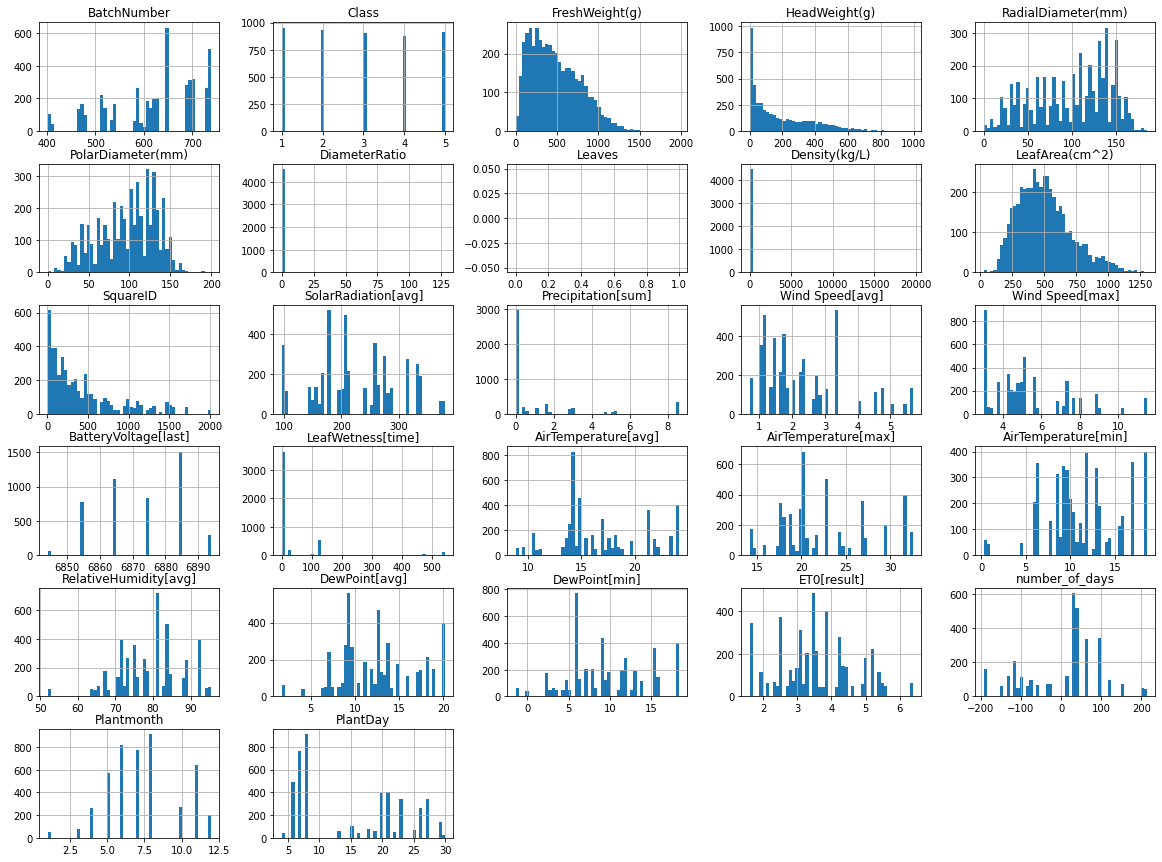

In [50]:
#Plotting the column distributions
_ = data.hist(bins=50, figsize=(20,15))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 184.81 and sigma = 189.62



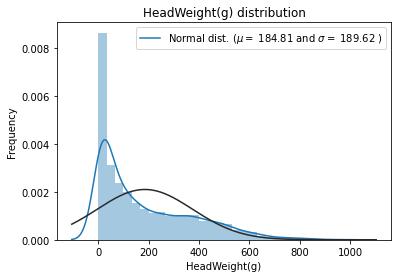

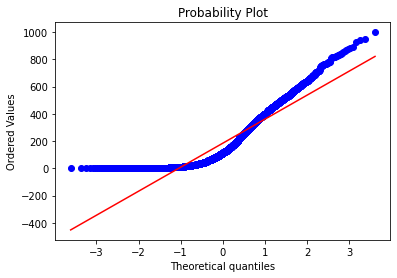

In [47]:
sns.distplot(data['HeadWeight(g)'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['HeadWeight(g)'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('HeadWeight(g) distribution')

#Plot the QQ-plot
fig = plt.figure()
res = stats.probplot(data['HeadWeight(g)'], plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 99.18 and sigma = 43.30



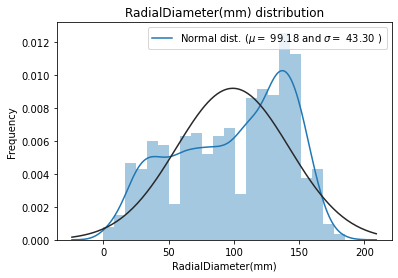

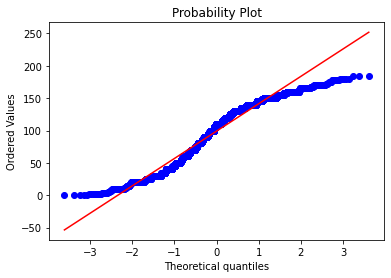

In [48]:
sns.distplot(data['RadialDiameter(mm)'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['RadialDiameter(mm)'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('RadialDiameter(mm) distribution')

#Plot the QQ-plot
fig = plt.figure()
res = stats.probplot(data['RadialDiameter(mm)'], plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 96.79 and sigma = 35.40



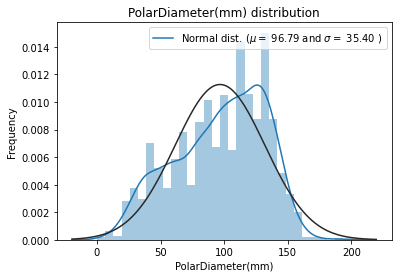

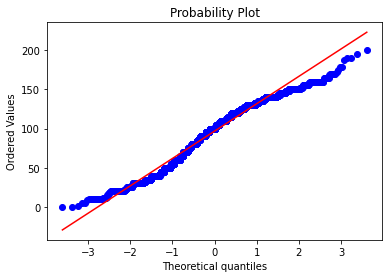

In [49]:
sns.distplot(data['PolarDiameter(mm)'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['PolarDiameter(mm)'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('PolarDiameter(mm) distribution')

#Plot the QQ-plot
fig = plt.figure()
res = stats.probplot(data['PolarDiameter(mm)'], plot=plt)
plt.show()